### Preprocesamiento

In [1]:
from utils.preprocesamiento import StemmerTokenizer, make_BoW_preprocess

tokenizador = StemmerTokenizer()
preprocessing = make_BoW_preprocess(tokenizador,'comment',max_ngram=2,min_ngram=1)

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

bog_pipeline = Pipeline(
    [("Preprocessing", preprocessing),
    ("Selection", SelectPercentile(f_classif, percentile=90)),
    ("Clasificador", MultinomialNB())]
)

### Cargar datos

In [3]:
from utils.cargar import df_caso
from utils.preprocesamiento import process_df

caso = 'adela'
df = df_caso(caso)

df = process_df(df,'comment','sel',verbose=True)

df = df.drop(columns=['user_id','team_id','gender','df','title','opt_left','opt_right','max_num','phase','time','curso'])

df.head()

79 rows found with non string elements for column comment (1.02%)
Deleting 1059 columns for which max target value is over 7 (13.72%)
6579 available rows after processing


,sel,comment
id,,
20277,4,hola
20278,6,No
20283,1,Eres un monstruo maldita
20285,6,Hola
20291,5,porque sí


In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(df, df['sel'], test_size=.25, stratify=df['sel'])

In [7]:
bog_pipeline.fit(df_train,y_train)

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('bag-of-words',
                                                  CountVectorizer(ngram_range=(1,
                                                                               2),
                                                                  tokenizer=<__main__.StemmerTokenizer object at 0x7fb69f1095e0>),
                                                  'comment')])),
                ('Selection', SelectPercentile(percentile=90)),
                ('Clasificador', MultinomialNB())])

In [8]:
from sklearn.metrics import classification_report

y_pred = bog_pipeline.predict(df_test)

print("Resultados clasificador Naive-Bayes multinomial")
print(classification_report(y_test, y_pred))

Resultados clasificador Naive-Bayes multinomial
              precision    recall  f1-score   support

           1       0.67      0.03      0.06       203
           2       0.48      0.82      0.61       629
           3       0.42      0.51      0.46       406
           4       0.57      0.18      0.27       221
           5       0.70      0.05      0.09       142
           6       0.00      0.00      0.00        44

    accuracy                           0.47      1645
   macro avg       0.47      0.26      0.25      1645
weighted avg       0.51      0.47      0.40      1645



/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

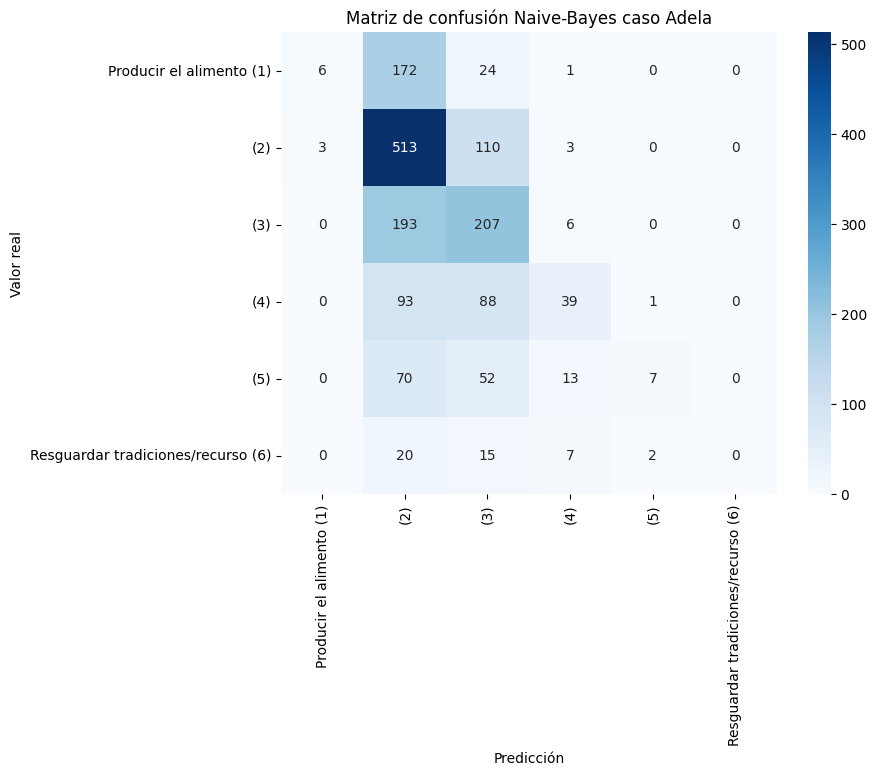

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Example class labels
class_labels = ['Producir el alimento (1)', '(2)', '(3)', '(4)', '(5)', 'Resguardar tradiciones/recurso (6)']

# Convert confusion matrix to NumPy array
cm_array = np.array(cm)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_array, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión Naive-Bayes caso Adela')

# Show the plot
plt.show()

In [10]:
df.loc[(df['sel']==2) | (df['sel']==3),'sel'] = 1
df.loc[(df['sel']==4) | (df['sel']==5),'sel'] = 6

df.head()

,sel,comment
id,,
20277,6,hola
20278,6,No
20283,1,Eres un monstruo maldita
20285,6,Hola
20291,6,porque sí


In [11]:
df['sel'].value_counts()

1    4954
6    1625
Name: sel, dtype: int64

In [14]:
df_train_binary, df_test_binary, y_train_binary, y_test_binary = train_test_split(df, df['sel'], test_size=.25, stratify=df['sel'])

bog_pipeline_binary = Pipeline(
    [("Preprocessing", preprocessing),
    ("Selection", SelectPercentile(f_classif, percentile=90)),
    ("Clasificador", MultinomialNB())]
)

bog_pipeline_binary.fit(df_train_binary,y_train_binary)

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('bag-of-words',
                                                  CountVectorizer(ngram_range=(1,
                                                                               2),
                                                                  tokenizer=<__main__.StemmerTokenizer object at 0x7fb69f1095e0>),
                                                  'comment')])),
                ('Selection', SelectPercentile(percentile=90)),
                ('Clasificador', MultinomialNB())])

In [15]:
y_pred_binary = bog_pipeline_binary.predict(df_test_binary)

print("Resultados clasificador Naive-Bayes multinomial (binario)")
print(classification_report(y_test_binary, y_pred_binary))

Resultados clasificador Naive-Bayes multinomial (binario)
              precision    recall  f1-score   support

           1       0.83      0.94      0.89      1239
           6       0.71      0.43      0.54       406

    accuracy                           0.82      1645
   macro avg       0.77      0.69      0.71      1645
weighted avg       0.80      0.82      0.80      1645

